# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_keys

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base Url
units = "Imperial"

url = f"https://api.openweathermap.org/data/2.5/weather?APPID={weather_api_keys}&units={units}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
          
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # city_url = f"https://api.openweathermap.org/data/2.5/weather?q={country code}&appid={weather_api_keys}"
    city_url= f"{url}&q=" + city.replace(" ", "+")
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
 # Parse the JSON and retrieve data
        city_weather  = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (city_weather["coord"]["lat"])
        city_lng = (city_weather["coord"]["lon"])
        city_max_temp = int(city_weather["main"]["temp_max"])
        city_humidity = (city_weather["main"]["humidity"])
        city_clouds = (city_weather["clouds"]["all"])
        city_wind = (city_weather["wind"]["speed"])
        city_country = (city_weather["sys"]["country"])
        city_date = (city_weather["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except: 
        print('City not found. Skipping...') 
        pass
       
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | berlevag
Processing Record 2 of Set 1 | risti
Processing Record 3 of Set 1 | labuan
Processing Record 4 of Set 1 | olafsvik
Processing Record 5 of Set 1 | ko samui
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | mackay
Processing Record 9 of Set 1 | namie
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | alexandria
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | klaksvik
Processing Record 15 of Set 1 | itarema
Processing Record 16 of Set 1 | andenes
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | bijar
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | promakhoi
City not found. Skipping...
Processing Record 22 of Set 1 | aba

In [25]:
len(city_data)

582

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,berlevag,70.8578,29.0864,24,93,100,9.22,NO,1675364771
1,risti,58.9975,24.0580,32,85,91,6.93,EE,1675364975
2,labuan,5.2767,115.2417,80,80,100,6.55,MY,1675364979
3,olafsvik,64.8945,-23.7142,39,83,73,17.85,IS,1675364914
4,ko samui,9.5357,99.9357,80,73,100,5.21,TH,1675364981


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,berlevag,70.8578,29.0864,24,93,100,9.22,NO,1675364771
1,risti,58.9975,24.0580,32,85,91,6.93,EE,1675364975
2,labuan,5.2767,115.2417,80,80,100,6.55,MY,1675364979
3,olafsvik,64.8945,-23.7142,39,83,73,17.85,IS,1675364914
4,ko samui,9.5357,99.9357,80,73,100,5.21,TH,1675364981


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

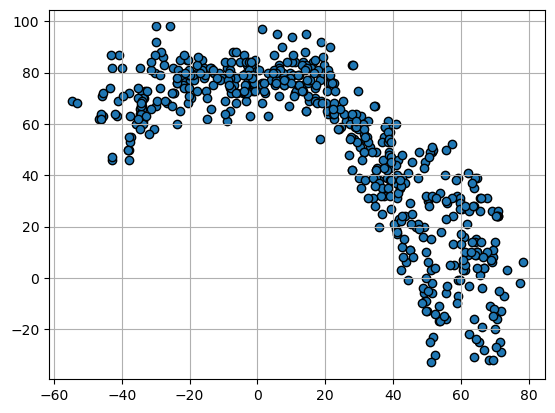

In [30]:
# Build scatter plot for latitude vs. temperature

latitude = city_data_df["Lat"]
max_temperature = city_data_df["Max Temp"]

# Incorporate the other graph properties

plt.scatter(latitude, max_temperature,marker="o",edgecolors="black")

plt.savefig("output_data/Fig1.png")
plt.grid()
# Show plot
plt.show()

#### Latitude Vs. Humidity

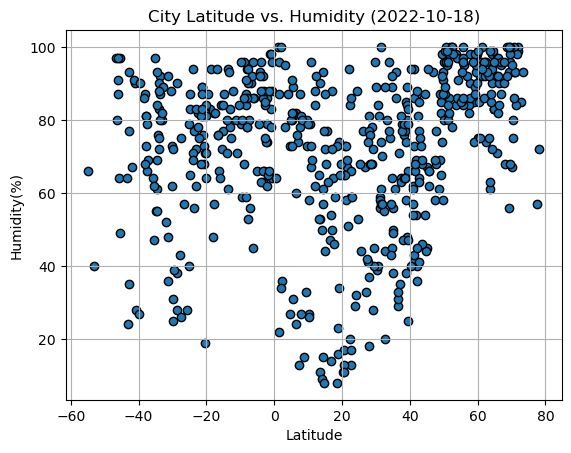

In [31]:
# Build the scatter plots for latitude vs. humidity

latitude = city_data_df["Lat"]
humid = city_data_df["Humidity"]
# Incorporate the other graph properties

plt.scatter(latitude, humid ,marker="o",edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

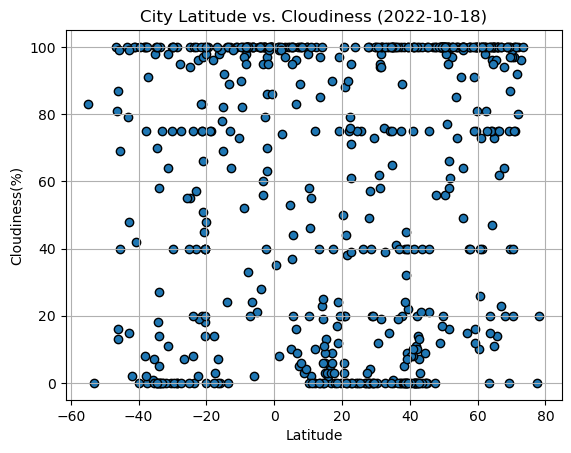

In [32]:
# Build the scatter plots for latitude vs. cloudiness

latitude = city_data_df["Lat"]
clouds = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(latitude, clouds ,marker="o",edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

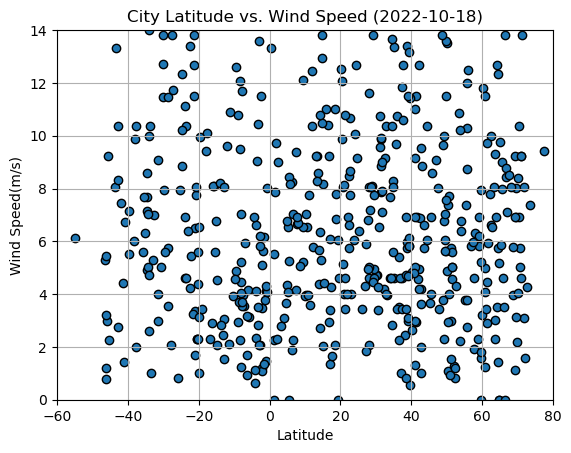

In [33]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
wind = city_data_df["Wind Speed"]


# Incorporate the other graph properties
plt.scatter(latitude, wind ,marker="o",edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.ylim(0,14)
plt.xlim(-60,80)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [65]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed")
    print(f"The r-squared is: {rvalue**2}")
    plt.show()
    


In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,berlevag,70.8578,29.0864,24,93,100,9.22,NO,1675364771
1,risti,58.9975,24.0580,32,85,91,6.93,EE,1675364975
2,labuan,5.2767,115.2417,80,80,100,6.55,MY,1675364979
3,olafsvik,64.8945,-23.7142,39,83,73,17.85,IS,1675364914
4,ko samui,9.5357,99.9357,80,73,100,5.21,TH,1675364981


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,carnarvon,-24.8667,113.6333,82,65,55,12.35,AU,1675364982
7,mackay,-21.1500,149.2000,79,76,51,6.49,AU,1675364983
9,rikitea,-23.1203,-134.9692,79,72,57,15.39,PF,1675364984
11,new norfolk,-42.7826,147.0587,46,77,15,2.77,AU,1675364985
13,itarema,-2.9248,-39.9167,83,66,100,13.60,BR,1675364730


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7351636103703825


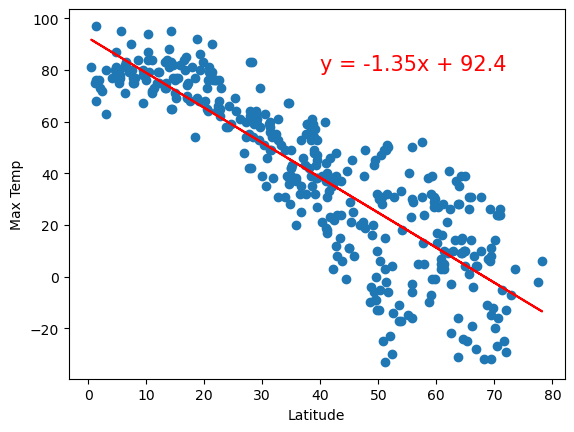

In [37]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values)


The r-squared is: 0.19505700792221128


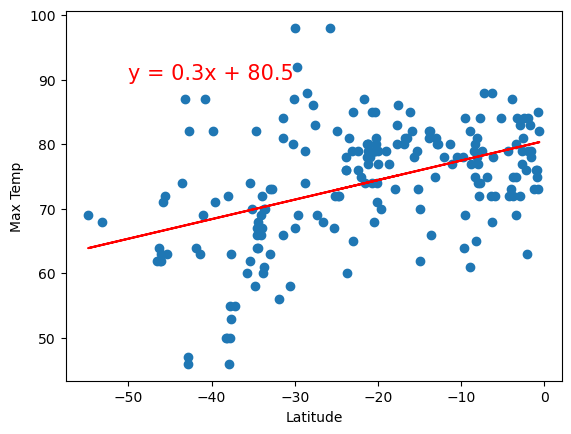

In [44]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

The relation between Latitude and Max Temp is between moderate to strong.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.2324215546090245


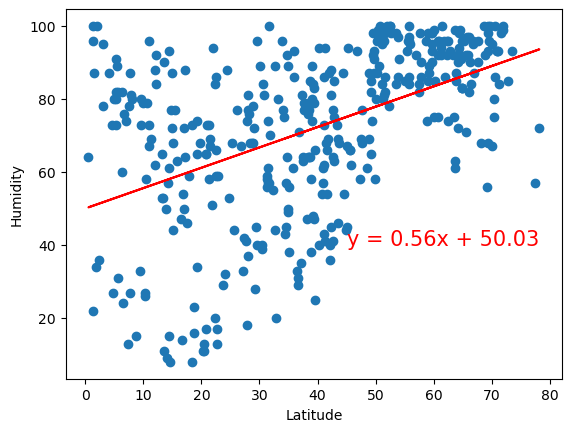

In [48]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values)

The r-squared is: 0.055847852079077026


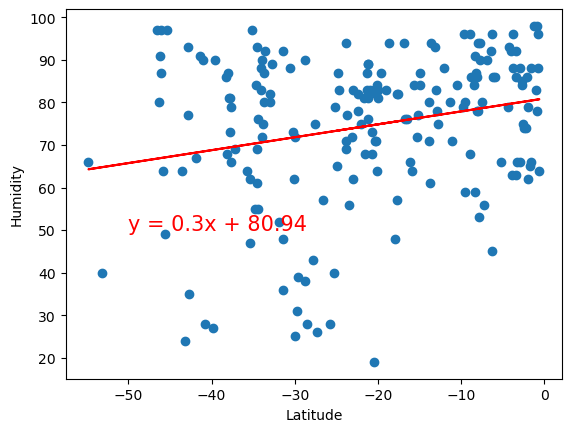

In [50]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

From r value it looks like there is very weak Relation between Humidity and Latitude

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.07550146507455614


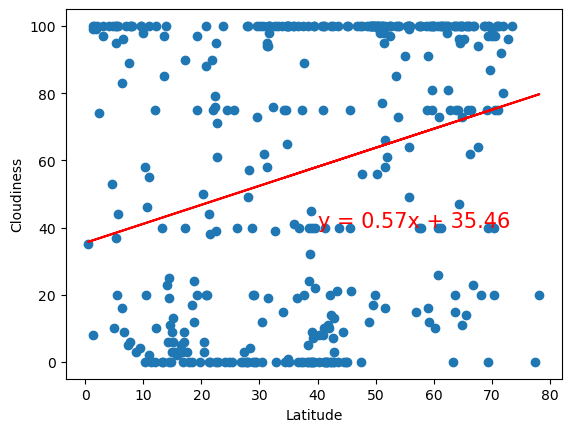

In [57]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values)

The r-squared is: 0.11248713526924249


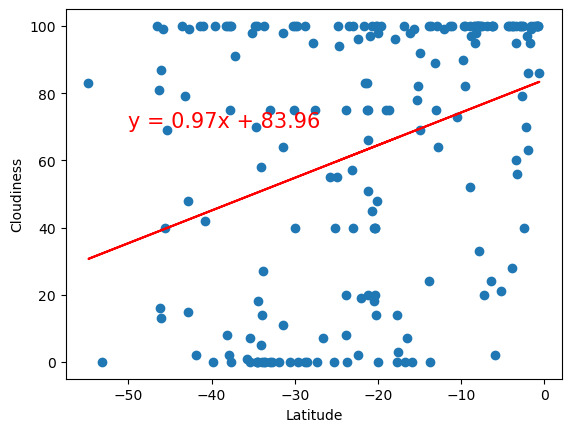

In [62]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is very weak to neglible relation in Cloudiness and Latitude

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.002547122154890672


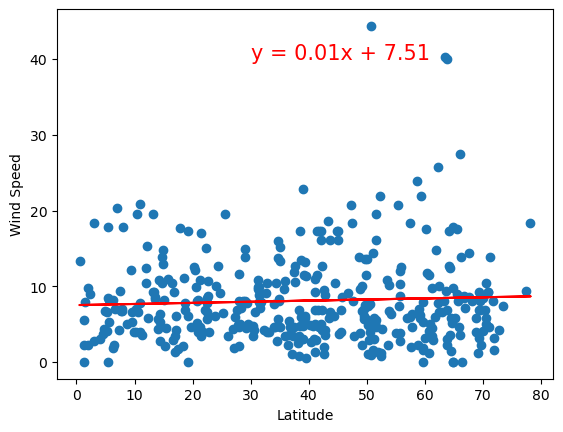

In [64]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values)

The r-squared is: 0.05171020358742263


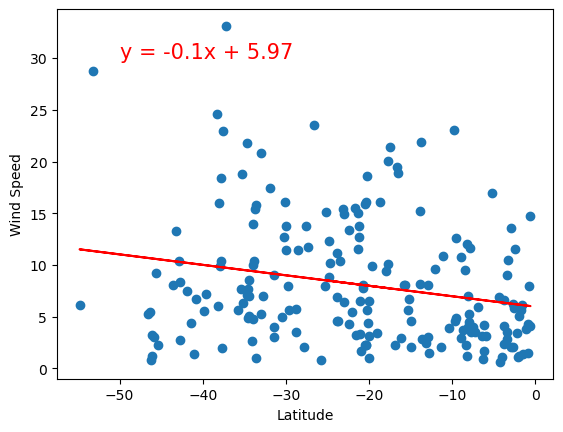

In [66]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
There is no (negligible/ very very weak) relationship  between Wind Speed and latitude as they have very small r- value.